# 🎧 Audio Signal Analysis and Frequency Filtering Using FFT and Spectrograms

##  Overview

This project demonstrates how real-world audio signals can be analyzed, filtered, and reconstructed using **frequency-domain signal processing techniques**.  
The main goal is to explore how different filters affect sound quality and to isolate individual animal calls from a mixed environmental recording.

Using **Python, NumPy, SciPy, and Matplotlib**, the project applies the **Fast Fourier Transform (FFT)** to decompose an audio signal into its frequency components, and then designs custom filters to manipulate those components.  
Finally, the processed signals are visualized through **spectrograms**, which show how frequency content evolves over time.

---

##  Project Objectives

- Load and preprocess a real `.wav` audio recording containing multiple animal sounds.  
- Convert the signal from the **time domain** to the **frequency domain** using FFT.  
- Visualize the raw waveform, amplitude spectrum, and spectrogram of the recording.  
- Design and apply two types of frequency filters:
  - **Brick-Wall Band-Pass Filter** – sharply isolates specific frequency bands.  
  - **Gaussian Band-Pass Filter** – smoothly preserves frequencies around a target range.  - Reconstruct the filtered signals using the **Inverse FFT** and compare results visually and audibly.  
- Evaluate how each filter type affects the clarity, smoothness, and separation of animal sounds.

---

##  Techniques & Tools

| Category | Tools / Methods Used |
|-----------|----------------------|
| **Programming Language** | Python |
| **Core Libraries** | NumPy, SciPy, Matplotlib, Seaborn, IPython.display |
| **Signal Processing** | FFT, Inverse FFT, Spectrograms, Gaussian Filtering |
| **Visualization** | Time-series plots, frequency spectra, spectrograms |
| **Audio Processing** | WAV file loading, playback, filtering, reconstruction |

---

##  Structure of the Notebook

| **Section** | **Description** |
|--------------|----------------|
| **1. Audio Signal Exploration** | Loads an environmental recording, extracts key metadata (sampling rate, duration), and visualizes the waveform and frequency spectrum. |
| **2. Frequency Filtering and Sound Isolation** | Implements and applies multiple band-pass filters to isolate individual animal sounds (e.g., frog, bird, insect) from the mixed signal. |
| **3. Gaussian Band-Pass Filtering** | Introduces a smooth Gaussian filter design, compares it to the sharp brick-wall filter, and visualizes the differences in the resulting spectrograms and playback. |

---

##  Expected Results

- Clear visualization of how frequency content changes over time in the original and filtered signals.  
- Successful **isolation of distinct animal calls** by selecting appropriate frequency ranges.  
- Demonstration of the difference between **hard cutoff** filtering and **smooth Gaussian filtering**, both visually (via spectrograms) and aurally (via playback).  
- Improved understanding of how frequency-domain manipulation can enhance or separate complex audio signals.

---

##  Learning Outcomes

Through this project, I gained practical experience in:
- Applying **Fourier Transform theory** to real-world audio data.  
- Designing and implementing custom **digital filters**.  
- Interpreting **spectrograms** and frequency-domain visualizations.  
- Comparing algorithmic approaches for signal smoothing and source separation.  
- Combining mathematical, coding, and analytical reasoning to solve applied problems.

---


### Part 1 
In this analysis, I first loaded a stereo WAV file and extracted the left channel to simplify processing, examined the sample rate and number of samples to determine the audio duration. To understand the signal's behavior, I plotted its waveform in the time domain, showing how amplitude changes over time. Then, I applied the Fast Fourier Transform to convert the signal into the frequency domain, revealing its dominant frequencies. Since the FFT is symmetric, I only plotted the positive frequencies using rfftfreq. Finally, I generated a spectrogram using the Short-Time Fourier Transform to visualize how the frequency content evolves over time.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as signal
import IPython.display as ipd
from scipy.signal import convolve
from matplotlib import pyplot as plt 
# Here, we import all packages we need.

# This is a package for handling and manipulating data.
import pandas as pd

# This is the standard package for plotting.
from matplotlib import pyplot as plt 

# Seaborn is build on matplotlib.
# It is more comfortable to use than pure matplotlib.
import seaborn as sns

# Numpy helps us handling arrays of numbers
import numpy as np

# We use this function to calculate the fft
from numpy.fft import fft, ifft

# This shifts the output of the fft so that zero frequency is at the centre
from numpy.fft import fftshift

# The inverse of fftshift 
from numpy.fft import ifftshift

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

from scipy import signal

from scipy.io import wavfile

import IPython.display as ipd

#loading wacfile
sample_rate, audio_data = wavfile.read("./Jungle-SoundBible.com-1211567897.wav")
#checking is audio is stereo or mono
print(audio_data.shape)

(119808, 2)


In [4]:
#The audio is a stereo so taking the left chanel 
audio_data = audio_data[:, 0]
# number of samples
num_samples = len(audio_data)

# duration in seconds
duration = num_samples / sample_rate

# Print the information
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {num_samples}")
print(f"Audio Duration: {duration:.2f} seconds")

# Audio
print("Audio:")
ipd.display(ipd.Audio(audio_data, rate=sample_rate))

Sample Rate: 22050 Hz
Number of Samples: 119808
Audio Duration: 5.43 seconds
Audio:


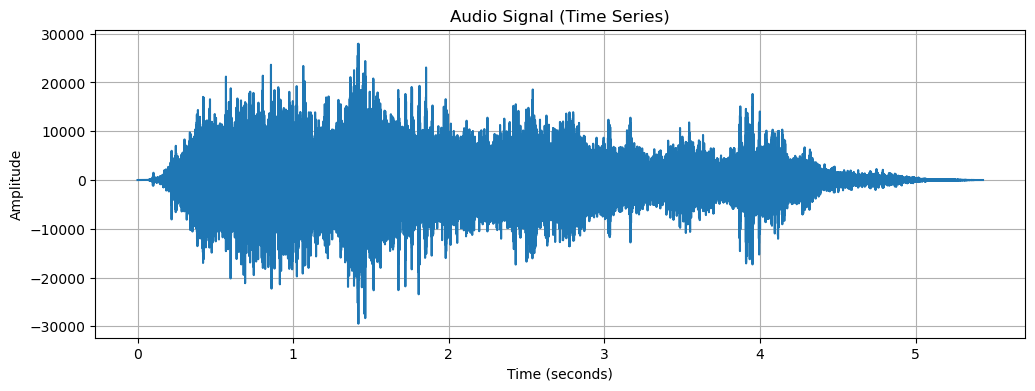

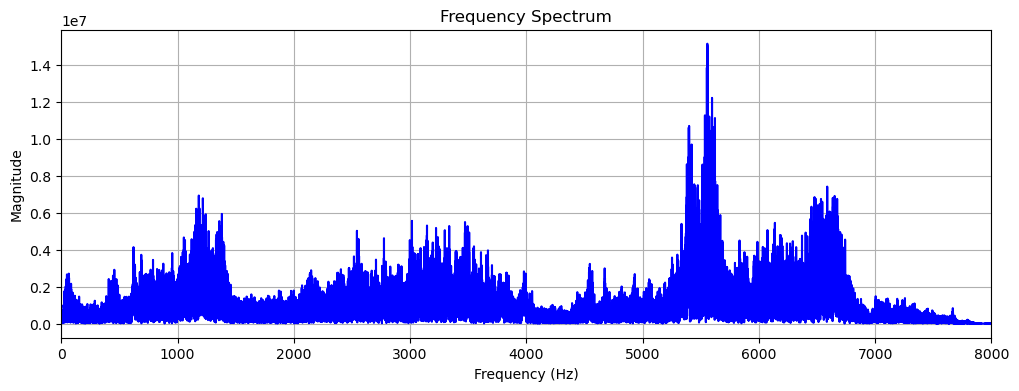

<function matplotlib.pyplot.show(close=None, block=None)>

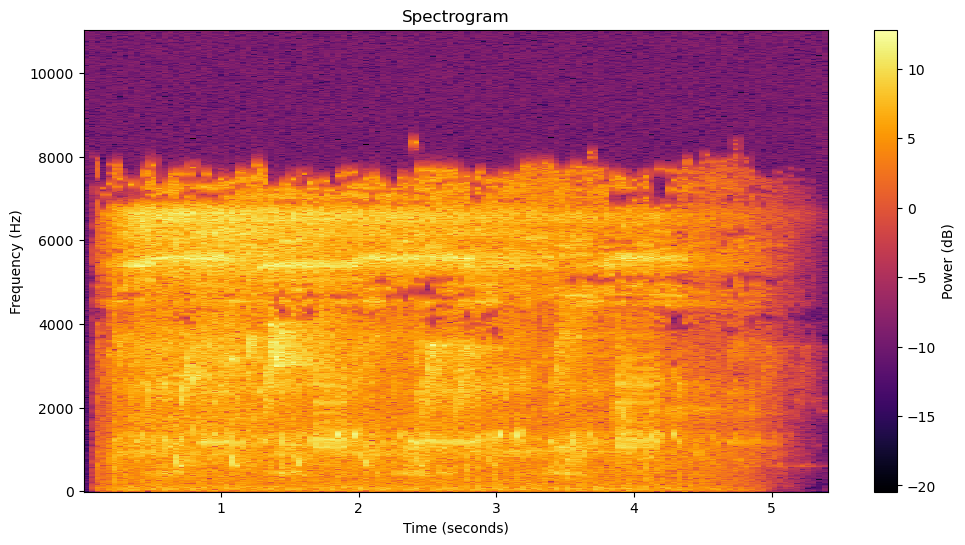

In [5]:
# computing x axis 
x = np.arange(num_samples)/sample_rate

# Time Series
plt.figure(figsize=(12, 4))
plt.plot(x, audio_data)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Audio Signal (Time Series)")
plt.grid()
plt.show()

#computing only the positive frequencies with rfftfreq (because FFT is symmetric)
freqs = np.fft.rfftfreq(num_samples, d=1/sample_rate)  # Frequency axis
fft_magnitude = np.abs(np.fft.rfft(audio_data))  

#  Spectrum
plt.figure(figsize=(12, 4))
plt.plot(freqs, fft_magnitude, color='blue')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.xlim(0, 8000)  # Show only up to Nyquist frequency
plt.grid()
plt.show()

# Spectrogram
plt.figure(figsize=(12, 6))
frequencies, times, Sxx = signal.spectrogram(audio_data, fs=sample_rate, nperseg=1024)
plt.pcolormesh(times, frequencies, np.log(Sxx), cmap='inferno')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Spectrogram")
plt.colorbar(label="Power (dB)")
plt.show

### Part 2
In this part, I focused on isolating and examining different frequency components of an audio signal. First, I generated spectrograms zoomed into specific frequency ranges to highlight areas where sound is more prominent, adjusting plt.ylim() and contrast settings for better visibility. To further analyze individual sound sources, I applied a Brick Wall filter using FFT, which strictly removes frequencies outside the selected range. I filtered the audio into four distinct frequency bands (500-900 Hz, 900-1400 Hz, 2000-3500 Hz, and 6000-8000 Hz) to separate different potential sound sources. By playing back these filtered signals, I could audibly distinguish each frequency range and the respective animals: owl, frog, bird, insect. Finally, created spectrograms of the filtered sounds.



<function matplotlib.pyplot.show(close=None, block=None)>

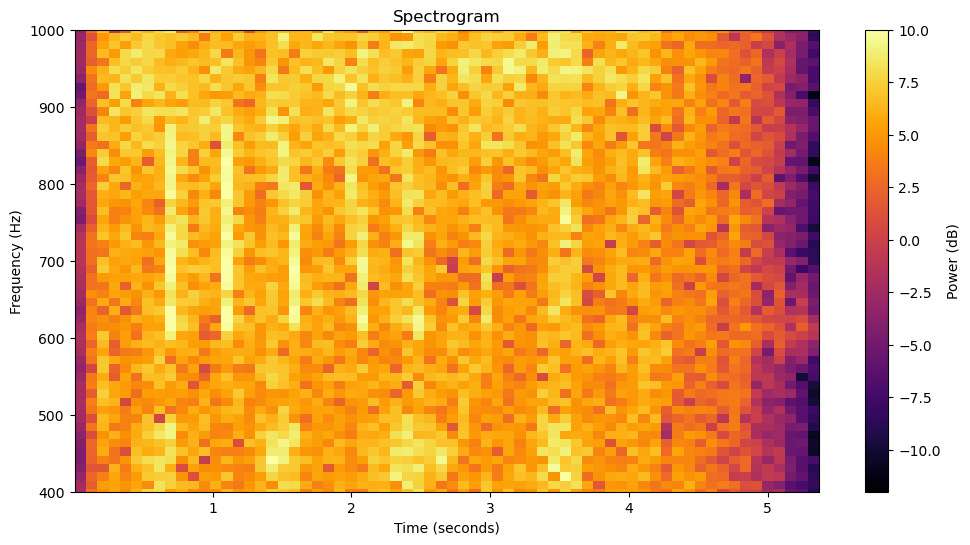

In [7]:
# 400 - 1000 Hz
plt.figure(figsize=(12, 6))
frequencies, times, Sxx = signal.spectrogram(audio_data, fs=sample_rate, nperseg=2048)
plt.pcolormesh(times, frequencies, np.log(Sxx), cmap='inferno', vmin = -12, vmax = 10)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Spectrogram")
plt.ylim(400, 1000)
plt.colorbar(label="Power (dB)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

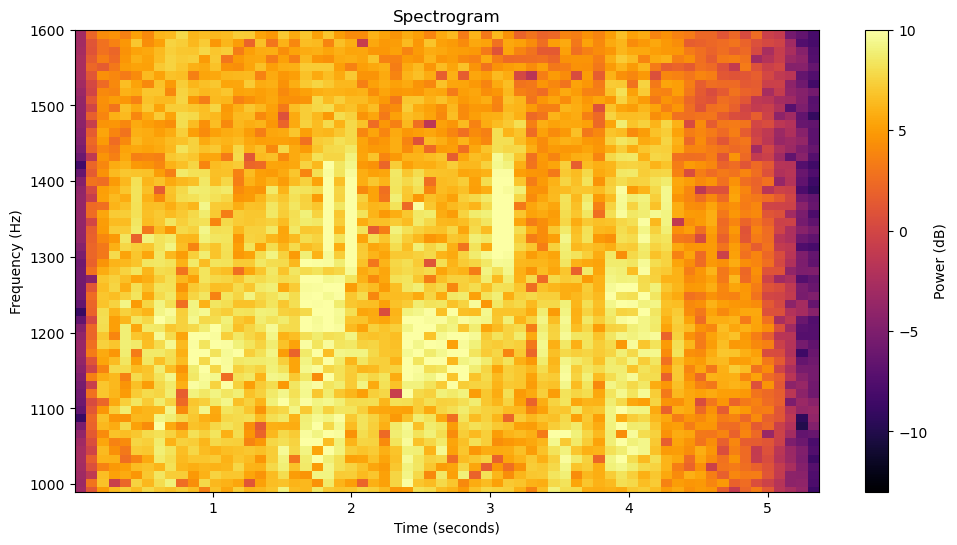

In [8]:
# 990 - 1600 Hz
plt.figure(figsize=(12, 6))
frequencies, times, Sxx = signal.spectrogram(audio_data, fs=sample_rate, nperseg=2048)
plt.pcolormesh(times, frequencies, np.log(Sxx), cmap='inferno', vmin = -13, vmax = 10)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Spectrogram")
plt.ylim(990, 1600)
plt.colorbar(label="Power (dB)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

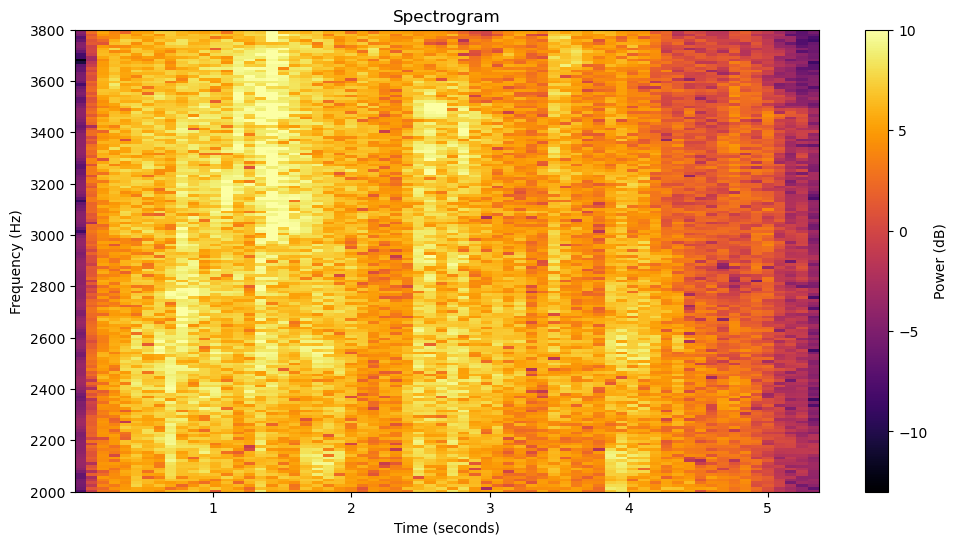

In [9]:
# 2000 - 3800Hz
plt.figure(figsize=(12, 6))
frequencies, times, Sxx = signal.spectrogram(audio_data, fs=sample_rate, nperseg=2048)
plt.pcolormesh(times, frequencies, np.log(Sxx), cmap='inferno', vmin = -13, vmax = 10)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Spectrogram")
plt.ylim(2000, 3800)
plt.colorbar(label="Power (dB)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

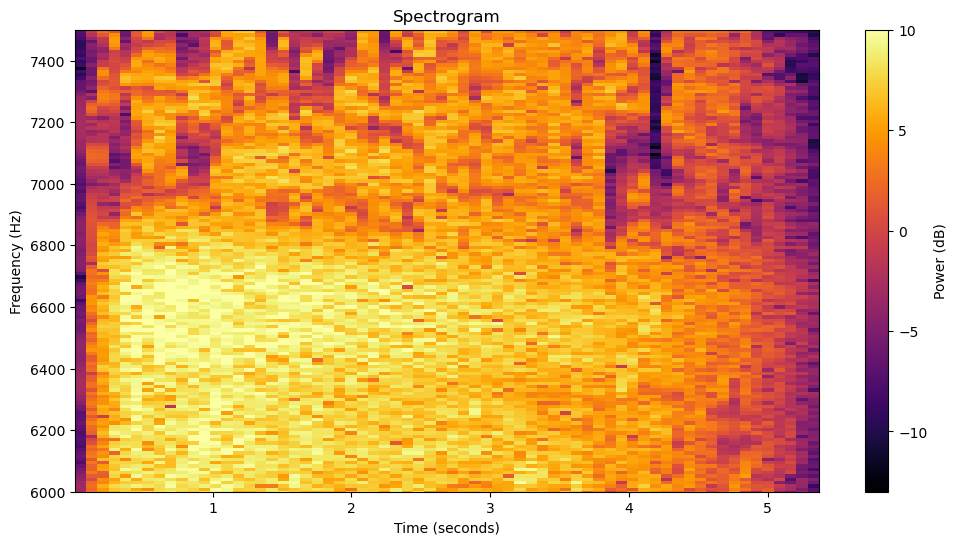

In [10]:
#  Spectrograms zoomed in where sound appears more profound using plt.ylim and 'vmin' and 'vmax' for better contrast
# 6000, 7500 Hz
plt.figure(figsize=(12, 6))
frequencies, times, Sxx = signal.spectrogram(audio_data, fs=sample_rate, nperseg=2048)
plt.pcolormesh(times, frequencies, np.log(Sxx), cmap='inferno', vmin = -13, vmax = 10)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.title("Spectrogram")
plt.ylim(6000, 7500)
plt.colorbar(label="Power (dB)")
plt.show

In [11]:
# Creating a to apply a Brick Wall filter
def brick_wall_filter(audio, lowcut, highcut, sample_rate):
    freq_axis = np.fft.rfftfreq(len(audio) , d=1/sample_rate)  # Frequency axis
    fft_audio = np.fft.rfft(audio)  # Convert audio to frequency domain

    # Brick Wall filter (1 inside range, 0 outside)
    filter_mask = np.zeros_like(freq_axis)
    filter_mask[(freq_axis >= lowcut) & (freq_axis <= highcut)] = 1  

    # Mltiplying it by the frequency domain
    filtered_fft_audio = fft_audio * filter_mask

    # Converting back to the time domain
    filtered_audio = np.fft.irfft(filtered_fft_audio)

    return filtered_audio

filtered_500_900 = brick_wall_filter(audio_data, 500, 900, sample_rate)   # First animal (500-900 Hz)
filtered_6000_6800 = brick_wall_filter(audio_data, 6000, 6800, sample_rate)  # Second animal (6000-8000 Hz)
filtered_900_1400 = brick_wall_filter(audio_data, 900, 1400, sample_rate)  # Third animal (1000-1500 Hz)
filtered_2000_3500 = brick_wall_filter(audio_data, 2000, 3500, sample_rate)  # Fourth animal (2000-4000 Hz)

# filtered sounds
print("Playing Filtered Sounds:")
print("▶️ 500-900 Hz")
ipd.display(ipd.Audio(filtered_500_900, rate=sample_rate))

print("▶️ 900-1400 Hz")
ipd.display(ipd.Audio(filtered_900_1400, rate=sample_rate))


print("▶️ 2000-3500 Hz")
ipd.display(ipd.Audio(filtered_2000_3500, rate=sample_rate))

print("▶️ 6000-6800 Hz")
ipd.display(ipd.Audio(filtered_6000_6800, rate=sample_rate))

Playing Filtered Sounds:
▶️ 500-900 Hz


▶️ 900-1400 Hz


▶️ 2000-3500 Hz


▶️ 6000-6800 Hz


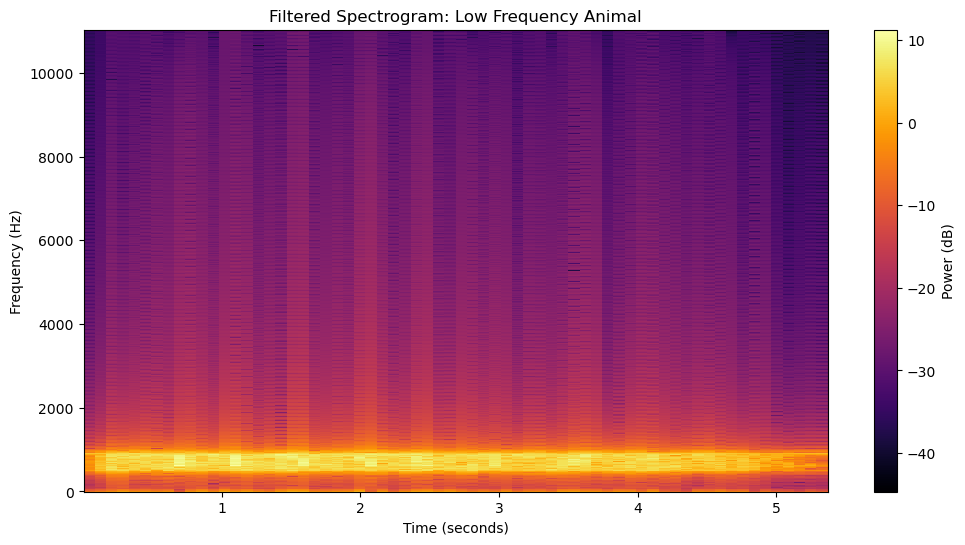

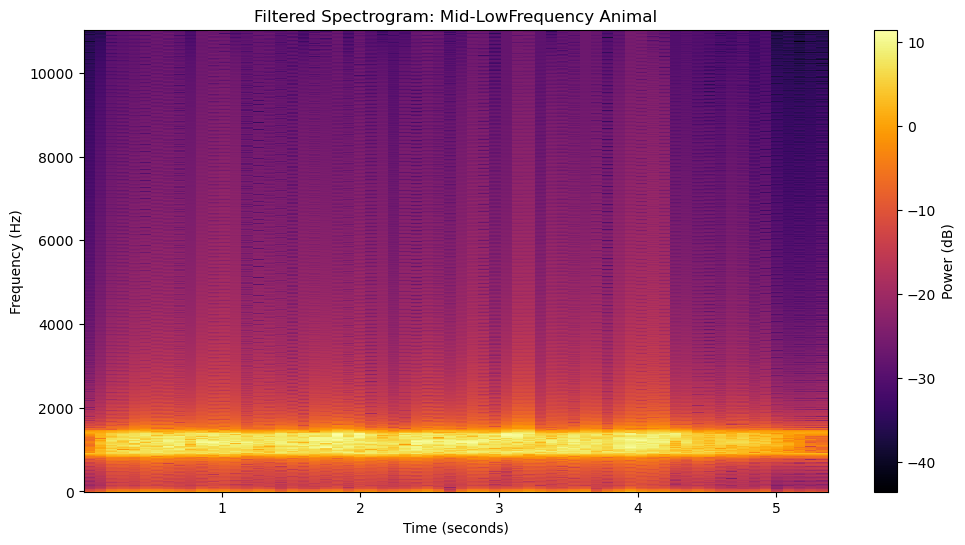

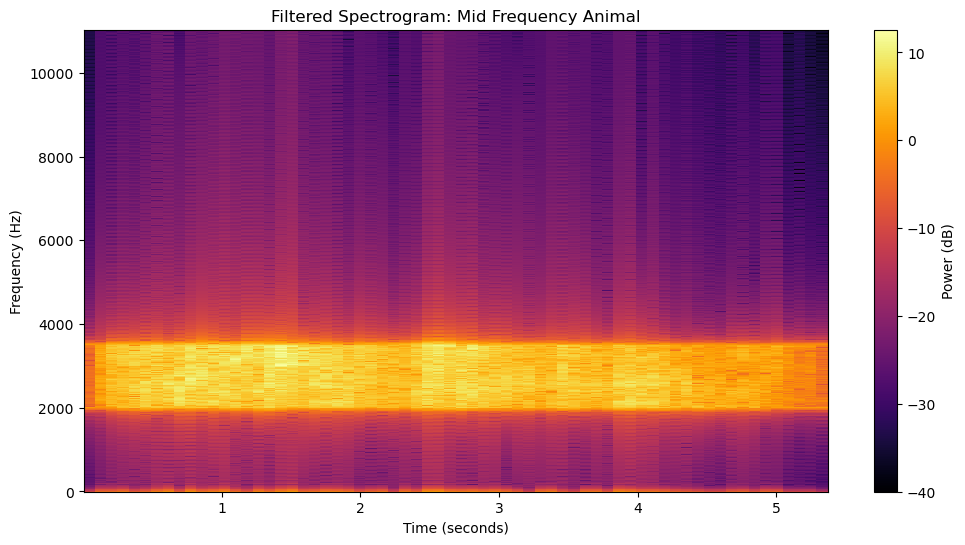

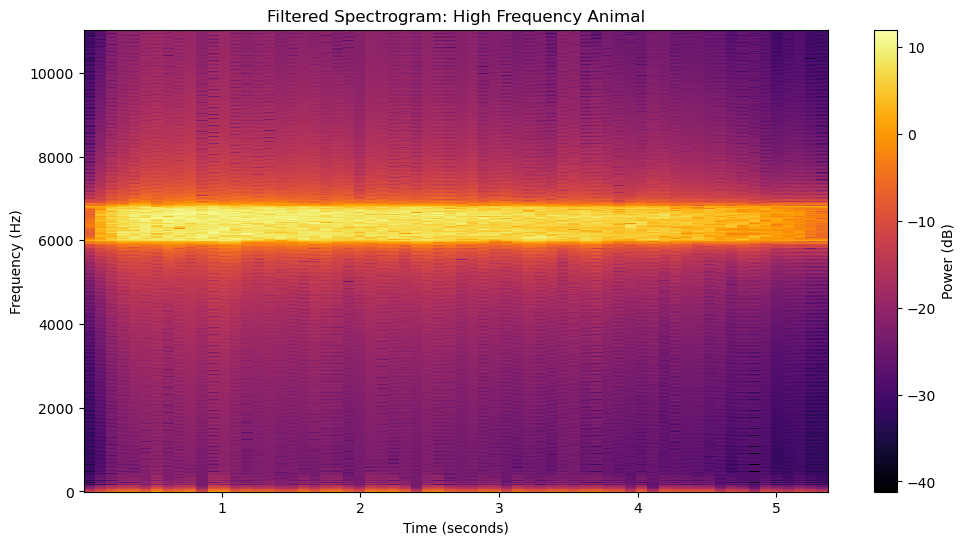

In [12]:
#plotting Spectogram after Brick Wall filter 
def plot_spectrogram (data, title): 
    plt.figure(figsize=(12, 6))
    frequencies, times, Sxx = signal.spectrogram(data, fs=sample_rate, nperseg=2048)    
    plt.pcolormesh(times, frequencies, np.log(Sxx), cmap='inferno')
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (seconds)")
    plt.title(title)
    plt.colorbar(label="Power (dB)")
    plt.show()
plot_spectrogram(filtered_500_900, "Filtered Spectrogram: Low Frequency Animal")
plot_spectrogram(filtered_900_1400, "Filtered Spectrogram: Mid-LowFrequency Animal")
plot_spectrogram(filtered_2000_3500, "Filtered Spectrogram: Mid Frequency Animal")
plot_spectrogram(filtered_6000_6800, "Filtered Spectrogram: High Frequency Animal")

### Part 3 
Finally , I implemented a smooth Gaussian bandpass filter to enhance 500-900 frequancy changes and maintaining a better transition, avoiding the sharper cutoffs of a brick-wall filter. I compared its effect against a benchmark filter, which strictly passes frequencies within the selected range without smoothing. This showed how the Gaussian filter provides a softer transition. I then played the original, benchmark-filtered, and Gaussian-filtered audio to compare their perceptual differences. Finally, I generated a spectrogram of the filtered signal to observe how the frequency content was affected.

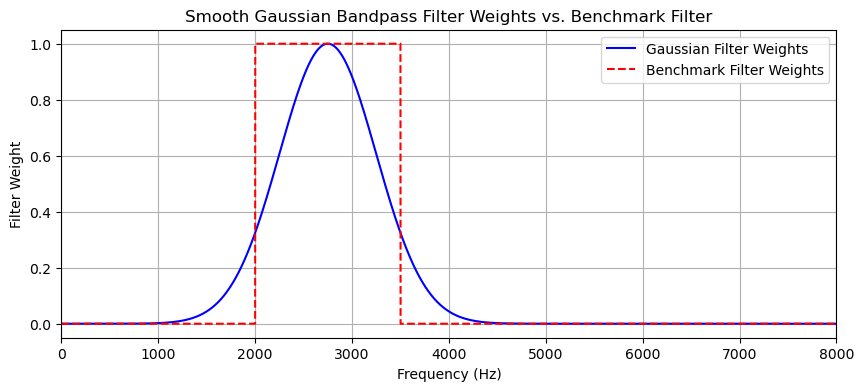

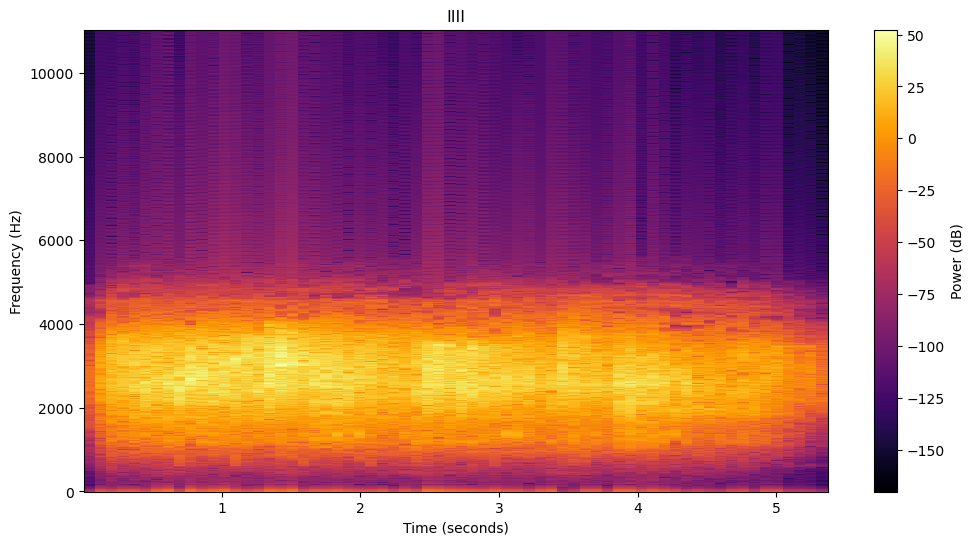

🎵 Playing Original Animal Sound:


🎵 Playing Benchmark Animal Sound:


🎵 Playing Gaussian Bandpass Filtered Animal Sound:


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as signal
import IPython.display as ipd

#  Nyquist Frequency
nyquist = sample_rate / 2

#  Gaussian Bandpass Filter 
def smooth_bandpass_filter(signal_data, lowcut, highcut, sample_rate):
 
    nyquist = 0.5 * sample_rate
    freqs = np.fft.rfftfreq(len(signal_data), d=1/sample_rate)

    # Gaussian transition
    center_freq = (lowcut + highcut) / 2
    std_dev = (highcut - lowcut) / 3 # We divide by 3 instead of 2 to sharpen the filter and better isolate target animals from others with similar frequencies.
    # Gaussian filter 
    gaussian_kernel = np.exp(-0.5 * ((freqs - center_freq) / std_dev) ** 2)

    # Normalizing kernel

    #  filtering in the frequency domain
    spectrum = np.fft.rfft(signal_data)
    filtered_spectrum = spectrum * gaussian_kernel
    filtered_signal = np.fft.irfft(filtered_spectrum)

    return filtered_signal, gaussian_kernel, freqs

lowcut, highcut =2000, 3500  # Example frequency band (adjust as needed)
filtered_signal, filter_weights, freqs = smooth_bandpass_filter(audio_data, lowcut, highcut, sample_rate)

# Benchmark filter for comparison 
def benchmark_filter(freqs, lowcut, highcut):
    return np.where((freqs >= lowcut) & (freqs <= highcut), 1, 0)

bench_filter_weights = benchmark_filter(np.fft.rfftfreq(len(audio_data), d=1/sample_rate), 2000, 3500)

# Gaussian Filter Weights and Benchmark Filter
plt.figure(figsize=(10, 4))
freqs = np.fft.rfftfreq(len(audio_data), d=1/sample_rate)
plt.plot(freqs, filter_weights, color='blue', label="Gaussian Filter Weights")
plt.plot(freqs, bench_filter_weights, color='red', linestyle='dashed', label="Benchmark Filter Weights")
plt.xlim(0, 8000) 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Filter Weight")
plt.title("Smooth Gaussian Bandpass Filter Weights vs. Benchmark Filter")
plt.legend()
plt.grid()
plt.show()


# Spectrogram of the filtered signal

plt.figure(figsize=(12, 6))
frequencies, times, Sxx = signal.spectrogram(filtered_signal, fs=sample_rate, nperseg=2048)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='inferno')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")

plt.title('llll')
plt.colorbar(label="Power (dB)")
plt.show()




# Finally Comparing Original Benchmark and filtered audio
print("🎵 Playing Original Animal Sound:")
ipd.display(ipd.Audio(audio_data, rate=sample_rate))

print("🎵 Playing Benchmark Animal Sound:")
ipd.display(ipd.Audio(filtered_2000_3500, rate=sample_rate))

print("🎵 Playing Gaussian Bandpass Filtered Animal Sound:")
ipd.display(ipd.Audio(filtered_signal, rate=sample_rate))